## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9607745	total: 47.8ms	remaining: 47.7s
1:	learn: 0.9414144	total: 48.7ms	remaining: 24.3s
2:	learn: 0.9217499	total: 49.9ms	remaining: 16.6s
3:	learn: 0.9053225	total: 50.8ms	remaining: 12.7s
4:	learn: 0.8898352	total: 51.9ms	remaining: 10.3s
5:	learn: 0.8736595	total: 53.1ms	remaining: 8.8s
6:	learn: 0.8568761	total: 54.2ms	remaining: 7.69s
7:	learn: 0.8402108	total: 55.2ms	remaining: 6.84s
8:	learn: 0.8250716	total: 56.3ms	remaining: 6.2s
9:	learn: 0.8076115	total: 57.3ms	remaining: 5.67s
10:	learn: 0.7926698	total: 58.5ms	remaining: 5.25s
11:	learn: 0.7795753	total: 59.3ms	remaining: 4.88s
12:	learn: 0.7641696	total: 60.2ms	remaining: 4.57s
13:	learn: 0.7489574	total: 61.2ms	remaining: 4.31s
14:	learn: 0.7358379	total: 62.2ms	remaining: 4.09s
15:	learn: 0.7223824	total: 63.2ms	remaining: 3.89s
16:	learn: 0.7097082	total: 64.4ms	remaining: 3.72s
17:	learn: 0.6972135	total: 65.3ms	remaining: 3.56s
18:	learn: 0.6852872	total: 66.2ms	remaining: 3

93:	learn: 0.3150279	total: 143ms	remaining: 1.38s
94:	learn: 0.3137234	total: 144ms	remaining: 1.37s
95:	learn: 0.3121281	total: 145ms	remaining: 1.37s
96:	learn: 0.3107376	total: 146ms	remaining: 1.36s
97:	learn: 0.3090939	total: 147ms	remaining: 1.35s
98:	learn: 0.3081504	total: 148ms	remaining: 1.35s
99:	learn: 0.3062990	total: 149ms	remaining: 1.34s
100:	learn: 0.3047538	total: 150ms	remaining: 1.34s
101:	learn: 0.3032268	total: 153ms	remaining: 1.34s
102:	learn: 0.3018021	total: 154ms	remaining: 1.34s
103:	learn: 0.3003986	total: 155ms	remaining: 1.33s
104:	learn: 0.2989656	total: 156ms	remaining: 1.33s
105:	learn: 0.2972583	total: 157ms	remaining: 1.32s
106:	learn: 0.2956733	total: 158ms	remaining: 1.32s
107:	learn: 0.2939514	total: 159ms	remaining: 1.31s
108:	learn: 0.2928416	total: 160ms	remaining: 1.31s
109:	learn: 0.2918572	total: 161ms	remaining: 1.3s
110:	learn: 0.2904551	total: 162ms	remaining: 1.3s
111:	learn: 0.2894593	total: 163ms	remaining: 1.29s
112:	learn: 0.2882837

218:	learn: 0.2129778	total: 277ms	remaining: 987ms
219:	learn: 0.2127584	total: 278ms	remaining: 987ms
220:	learn: 0.2122415	total: 279ms	remaining: 984ms
221:	learn: 0.2119795	total: 280ms	remaining: 982ms
222:	learn: 0.2115006	total: 281ms	remaining: 980ms
223:	learn: 0.2113146	total: 282ms	remaining: 978ms
224:	learn: 0.2107247	total: 284ms	remaining: 977ms
225:	learn: 0.2103682	total: 285ms	remaining: 975ms
226:	learn: 0.2098728	total: 286ms	remaining: 973ms
227:	learn: 0.2093945	total: 287ms	remaining: 971ms
228:	learn: 0.2089061	total: 288ms	remaining: 969ms
229:	learn: 0.2085834	total: 289ms	remaining: 967ms
230:	learn: 0.2081579	total: 290ms	remaining: 965ms
231:	learn: 0.2078947	total: 291ms	remaining: 963ms
232:	learn: 0.2075867	total: 292ms	remaining: 961ms
233:	learn: 0.2072601	total: 293ms	remaining: 959ms
234:	learn: 0.2067196	total: 294ms	remaining: 957ms
235:	learn: 0.2063559	total: 295ms	remaining: 954ms
236:	learn: 0.2062099	total: 296ms	remaining: 952ms
237:	learn: 

337:	learn: 0.1615418	total: 407ms	remaining: 797ms
338:	learn: 0.1611558	total: 409ms	remaining: 797ms
339:	learn: 0.1606783	total: 410ms	remaining: 795ms
340:	learn: 0.1602971	total: 411ms	remaining: 794ms
341:	learn: 0.1602077	total: 412ms	remaining: 792ms
342:	learn: 0.1597150	total: 413ms	remaining: 791ms
343:	learn: 0.1596188	total: 414ms	remaining: 790ms
344:	learn: 0.1592236	total: 415ms	remaining: 788ms
345:	learn: 0.1587803	total: 416ms	remaining: 787ms
346:	learn: 0.1584771	total: 417ms	remaining: 785ms
347:	learn: 0.1581378	total: 418ms	remaining: 784ms
348:	learn: 0.1576981	total: 419ms	remaining: 782ms
349:	learn: 0.1572719	total: 420ms	remaining: 781ms
350:	learn: 0.1571121	total: 421ms	remaining: 779ms
351:	learn: 0.1568137	total: 422ms	remaining: 778ms
352:	learn: 0.1564628	total: 423ms	remaining: 776ms
353:	learn: 0.1560293	total: 425ms	remaining: 775ms
354:	learn: 0.1555640	total: 426ms	remaining: 773ms
355:	learn: 0.1550241	total: 427ms	remaining: 772ms
356:	learn: 

462:	learn: 0.1259025	total: 540ms	remaining: 626ms
463:	learn: 0.1255962	total: 541ms	remaining: 625ms
464:	learn: 0.1254491	total: 542ms	remaining: 624ms
465:	learn: 0.1250695	total: 543ms	remaining: 623ms
466:	learn: 0.1249412	total: 544ms	remaining: 621ms
467:	learn: 0.1247870	total: 545ms	remaining: 620ms
468:	learn: 0.1244371	total: 546ms	remaining: 619ms
469:	learn: 0.1241455	total: 547ms	remaining: 617ms
470:	learn: 0.1240088	total: 548ms	remaining: 616ms
471:	learn: 0.1236692	total: 550ms	remaining: 615ms
472:	learn: 0.1236219	total: 550ms	remaining: 613ms
473:	learn: 0.1234282	total: 551ms	remaining: 612ms
474:	learn: 0.1231154	total: 552ms	remaining: 611ms
475:	learn: 0.1228171	total: 553ms	remaining: 609ms
476:	learn: 0.1227609	total: 554ms	remaining: 608ms
477:	learn: 0.1224749	total: 555ms	remaining: 607ms
478:	learn: 0.1224557	total: 557ms	remaining: 605ms
479:	learn: 0.1222133	total: 558ms	remaining: 604ms
480:	learn: 0.1218843	total: 559ms	remaining: 603ms
481:	learn: 

583:	learn: 0.1015259	total: 672ms	remaining: 478ms
584:	learn: 0.1011720	total: 673ms	remaining: 477ms
585:	learn: 0.1011270	total: 674ms	remaining: 476ms
586:	learn: 0.1008777	total: 675ms	remaining: 475ms
587:	learn: 0.1007024	total: 676ms	remaining: 474ms
588:	learn: 0.1005865	total: 677ms	remaining: 473ms
589:	learn: 0.1003648	total: 678ms	remaining: 471ms
590:	learn: 0.1002083	total: 679ms	remaining: 470ms
591:	learn: 0.0999259	total: 680ms	remaining: 469ms
592:	learn: 0.0997584	total: 681ms	remaining: 468ms
593:	learn: 0.0995247	total: 683ms	remaining: 467ms
594:	learn: 0.0994045	total: 684ms	remaining: 466ms
595:	learn: 0.0991710	total: 685ms	remaining: 465ms
596:	learn: 0.0990438	total: 686ms	remaining: 463ms
597:	learn: 0.0988991	total: 688ms	remaining: 462ms
598:	learn: 0.0987359	total: 689ms	remaining: 461ms
599:	learn: 0.0984729	total: 690ms	remaining: 460ms
600:	learn: 0.0983756	total: 691ms	remaining: 459ms
601:	learn: 0.0982813	total: 692ms	remaining: 458ms
602:	learn: 

702:	learn: 0.0817000	total: 804ms	remaining: 340ms
703:	learn: 0.0814384	total: 805ms	remaining: 339ms
704:	learn: 0.0812719	total: 806ms	remaining: 337ms
705:	learn: 0.0811803	total: 807ms	remaining: 336ms
706:	learn: 0.0810555	total: 808ms	remaining: 335ms
707:	learn: 0.0808917	total: 810ms	remaining: 334ms
708:	learn: 0.0806920	total: 811ms	remaining: 333ms
709:	learn: 0.0804919	total: 812ms	remaining: 332ms
710:	learn: 0.0803253	total: 813ms	remaining: 330ms
711:	learn: 0.0801404	total: 814ms	remaining: 329ms
712:	learn: 0.0800205	total: 815ms	remaining: 328ms
713:	learn: 0.0798368	total: 817ms	remaining: 327ms
714:	learn: 0.0796747	total: 818ms	remaining: 326ms
715:	learn: 0.0795328	total: 819ms	remaining: 325ms
716:	learn: 0.0793764	total: 820ms	remaining: 324ms
717:	learn: 0.0792387	total: 821ms	remaining: 322ms
718:	learn: 0.0791988	total: 822ms	remaining: 321ms
719:	learn: 0.0790569	total: 823ms	remaining: 320ms
720:	learn: 0.0788801	total: 824ms	remaining: 319ms
721:	learn: 

818:	learn: 0.0672166	total: 933ms	remaining: 206ms
819:	learn: 0.0670869	total: 934ms	remaining: 205ms
820:	learn: 0.0669294	total: 935ms	remaining: 204ms
821:	learn: 0.0668671	total: 936ms	remaining: 203ms
822:	learn: 0.0667990	total: 937ms	remaining: 202ms
823:	learn: 0.0666851	total: 939ms	remaining: 200ms
824:	learn: 0.0665781	total: 940ms	remaining: 199ms
825:	learn: 0.0665193	total: 942ms	remaining: 198ms
826:	learn: 0.0664032	total: 943ms	remaining: 197ms
827:	learn: 0.0663212	total: 944ms	remaining: 196ms
828:	learn: 0.0662019	total: 945ms	remaining: 195ms
829:	learn: 0.0661332	total: 947ms	remaining: 194ms
830:	learn: 0.0659831	total: 948ms	remaining: 193ms
831:	learn: 0.0658636	total: 949ms	remaining: 192ms
832:	learn: 0.0657648	total: 950ms	remaining: 190ms
833:	learn: 0.0656841	total: 951ms	remaining: 189ms
834:	learn: 0.0656160	total: 952ms	remaining: 188ms
835:	learn: 0.0654785	total: 953ms	remaining: 187ms
836:	learn: 0.0654527	total: 954ms	remaining: 186ms
837:	learn: 

941:	learn: 0.0562869	total: 1.06s	remaining: 65.6ms
942:	learn: 0.0561973	total: 1.07s	remaining: 64.5ms
943:	learn: 0.0561290	total: 1.07s	remaining: 63.4ms
944:	learn: 0.0560335	total: 1.07s	remaining: 62.2ms
945:	learn: 0.0559110	total: 1.07s	remaining: 61.1ms
946:	learn: 0.0558043	total: 1.07s	remaining: 60ms
947:	learn: 0.0557350	total: 1.07s	remaining: 58.8ms
948:	learn: 0.0556282	total: 1.07s	remaining: 57.7ms
949:	learn: 0.0555909	total: 1.07s	remaining: 56.6ms
950:	learn: 0.0555558	total: 1.08s	remaining: 55.4ms
951:	learn: 0.0555271	total: 1.08s	remaining: 54.3ms
952:	learn: 0.0554096	total: 1.08s	remaining: 53.2ms
953:	learn: 0.0552918	total: 1.08s	remaining: 52.1ms
954:	learn: 0.0552268	total: 1.08s	remaining: 50.9ms
955:	learn: 0.0551703	total: 1.08s	remaining: 49.8ms
956:	learn: 0.0551248	total: 1.08s	remaining: 48.6ms
957:	learn: 0.0550713	total: 1.08s	remaining: 47.5ms
958:	learn: 0.0549935	total: 1.08s	remaining: 46.4ms
959:	learn: 0.0548810	total: 1.08s	remaining: 45

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

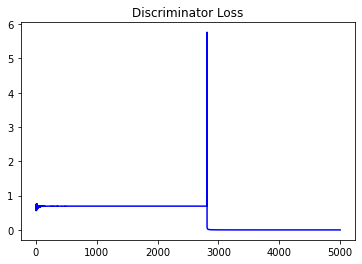

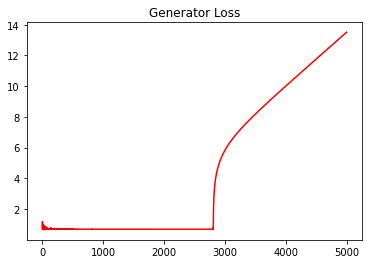

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

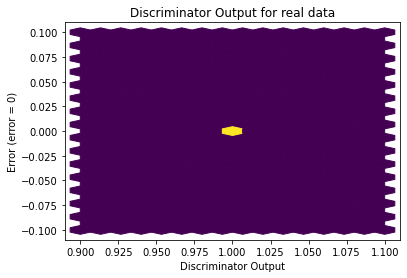

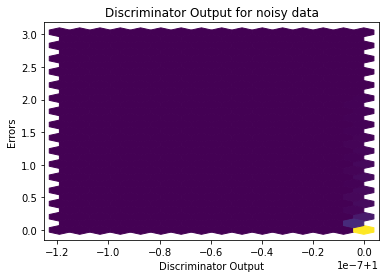

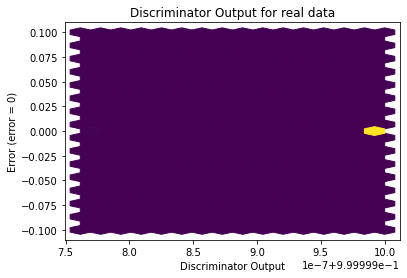

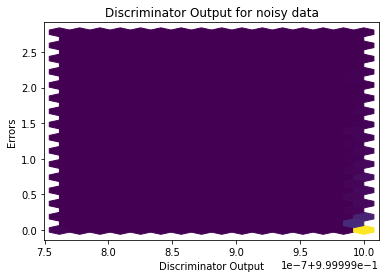

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


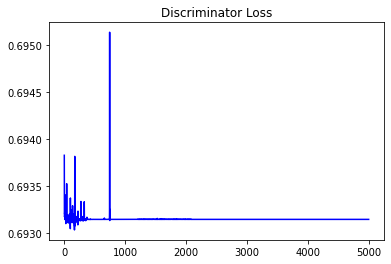

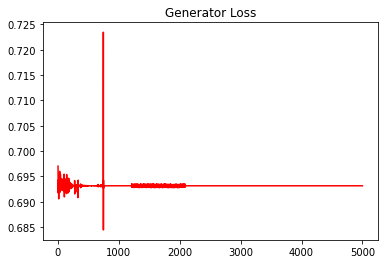

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

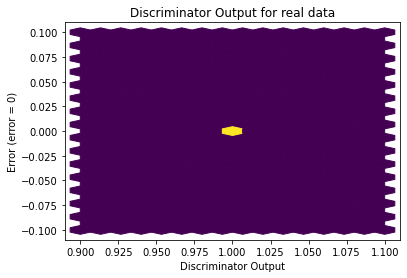

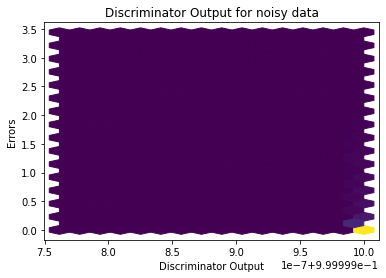

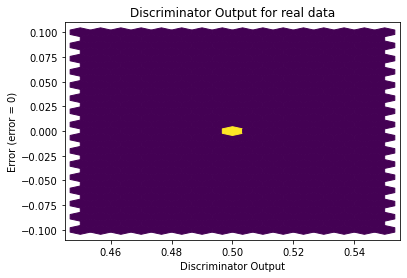

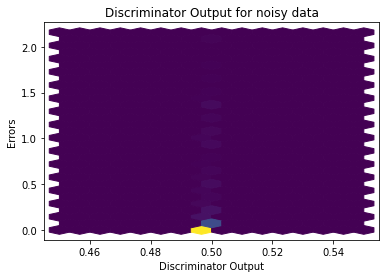

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0142]], device='cuda:0', requires_grad=True)
